# 3.1.1 랜덤하게 가중치를 적용해 사인곡선 그리기

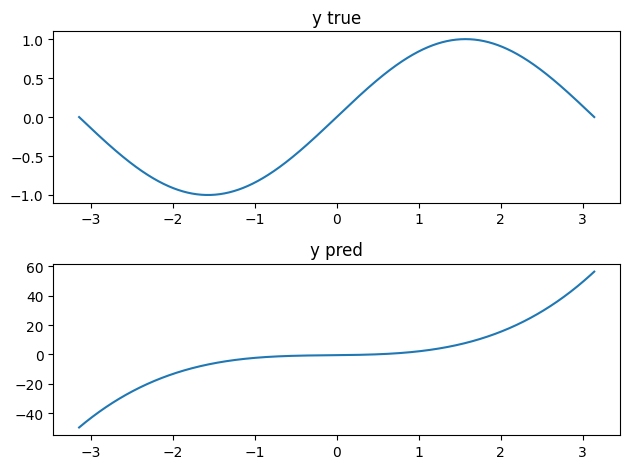

In [23]:
import math # 수학 패키지
import torch # 파이토치 모듈
import matplotlib.pyplot as plt # 시각화 모듈

# -pi부터 pi 사이에서 점 1,000개 추출
x = torch.linspace(-math.pi, math.pi, 1_000)

# 실제 사인 곡선에서 추출한 값으로 y 만들기
y = torch.sin(x)

# 예측 사인곡선에 사용할 임의의 가중치(계수) 뽑아 y 만들기
a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())

# 사인 함수를 근사할 3차 다항식 정의
y_random = a * x**3 + b * x**2 + c * x + d

# 실제 사인곡선을 실제 y값으로 만들기
plt.subplot(2, 1, 1)
plt.title("y true")
plt.plot(x, y)

# 예측 사인곡선을 임의의 가중치로 만든 y값으로 만들기
plt.subplot(2, 1, 2)
plt.title("y pred")
plt.plot(x, y_random)

# 그래프 간격맞춤
plt.tight_layout()

# 실제와 예측 사인곡선 출력하기
plt.show()

# 3.1.2 가중치를 학습시켜서 사인곡선 그리기

epoch1 loss:401650.6875
epoch101 loss:217.39898681640625
epoch201 loss:179.94384765625
epoch301 loss:149.45437622070312
epoch401 loss:124.29622650146484
epoch501 loss:103.5308837890625
epoch601 loss:86.38675689697266
epoch701 loss:72.22808837890625
epoch801 loss:60.53157043457031
epoch901 loss:50.86640930175781
epoch1001 loss:42.87732696533203
epoch1101 loss:36.271827697753906
epoch1201 loss:30.808712005615234
epoch1301 loss:26.2890567779541
epoch1401 loss:22.548934936523438
epoch1501 loss:19.452960968017578
epoch1601 loss:16.889406204223633
epoch1701 loss:14.766125679016113
epoch1801 loss:13.007022857666016
epoch1901 loss:11.549175262451172


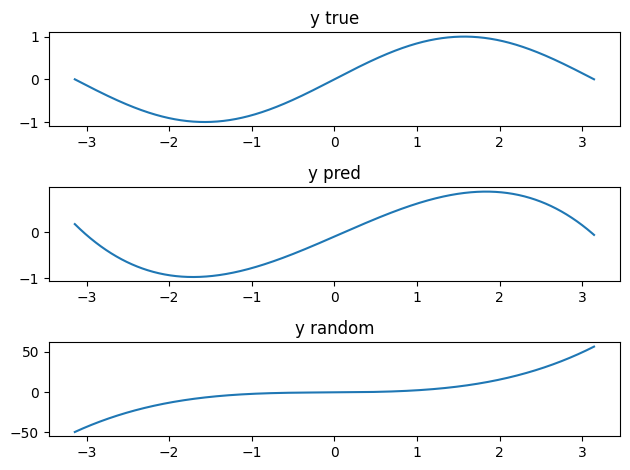

In [24]:
learning_rate = 1e-6 # 학습률 정의

# 학습 2,000번 진행
for epoch in range(2000):
    y_pred = a * x**3 + b * x**2 + c * x + d

    loss = (y_pred - y).pow(2).sum().item() # 손실(제곱오차) : 제곱(pow), 합(sum), 실수(item)
    if epoch % 100 == 0:
        print(f"epoch{epoch+1} loss:{loss}")
    
    grad_y_pred = 2.0 * (y_pred - y) # 기울기의 미분값
    grad_a = (grad_y_pred * x ** 3).sum()
    grad_b = (grad_y_pred * x ** 2).sum()
    grad_c = (grad_y_pred * x).sum()
    grad_d = grad_y_pred.sum()

    a -= learning_rate * grad_a # 가중치 업데이트
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

# 실제 사인곡선을 실제 y값으로 만들기
plt.subplot(3, 1, 1)
plt.title("y true")
plt.plot(x, y)

# 예측한 가중치의 사인 곡선 그리기
plt.subplot(3, 1, 2)
plt.title("y pred")
plt.plot(x, y_pred)

# 랜덤한 가중치의 사인 곡선 그리기
plt.subplot(3, 1, 3)
plt.title("y random")
plt.plot(x, y_random)

plt.tight_layout()
plt.show()

# 3.2 손글씨 분류하기 : 다중분류

## 3.2.1 데이터 살펴보기

60000
10000


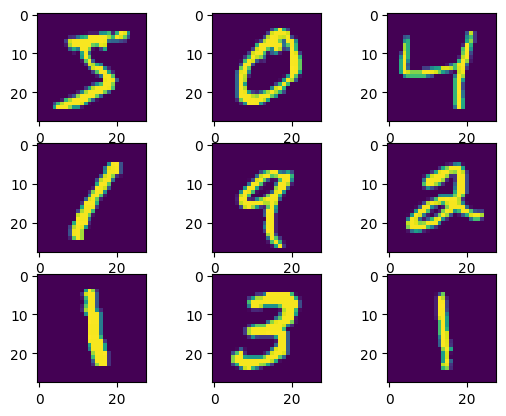

In [25]:
import matplotlib.pyplot as plt

from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor

# 학습용과 평가용 데이터 분리
training_data = MNIST(root="./", train=True, download=True, transform=ToTensor())
test_data = MNIST(root="./", train=False, download=True, transform=ToTensor())

print(len(training_data)) # 학습에 사용할 데이터 개수
print(len(test_data)) # 평가에 사용할 데이터 개수

for i in range(9): # 샘플이미지 9개 출력
    plt.subplot(3, 3, i+1)
    plt.imshow(training_data.data[i])
plt.show()

## 3.2.2 데이터 불러오기

In [26]:
from torch.utils.data.dataloader import DataLoader

train_loader = DataLoader(training_data, batch_size=32, shuffle=True)

# 평가용은 데이터를 섞을 필요 없음
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

## 3.2.3 모델 정의 및 학습하기

In [27]:
import torch
import torch.nn as nn

from torch.optim.adam import Adam

# 학습에 사용할 프로세서 지정
""" Window인 경우
device = "cuda" if torch.cuda.is_available() else "cpu"
"""
# 맥북인경우
device = torch.device("mps")

model = nn.Sequential(
    nn.Linear(784, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)
model.to(device) # 모델의 파라미터를 GPU로 보냄 

lr = 1e-3
optim = Adam(model.parameters(), lr=lr)

for epoch in range(20):
    for data, label in train_loader:
        optim.zero_grad()
        # 입력 데이터 모양을 모델의 입력에 맞게 변환
        data = torch.reshape(data, (-1, 784)).to(device)
        preds = model(data)

        loss = nn.CrossEntropyLoss()(preds, label.to(device)) # 손실 계산
        loss.backward() # 오차 역전파
        optim.step() # 최적화 진행

    
    print(f"epoch{epoch+1} loss:{loss.item()}")

# 모델을 MNIST.pth라는 이름으로 저장
torch.save(model.state_dict(), "MNIST.pth")

epoch1 loss:0.17704956233501434
epoch2 loss:0.11914028972387314
epoch3 loss:0.059101685881614685
epoch4 loss:0.032729506492614746
epoch5 loss:0.17402856051921844
epoch6 loss:0.02050177752971649
epoch7 loss:0.022297248244285583
epoch8 loss:0.02268638089299202
epoch9 loss:0.0525454543530941
epoch10 loss:0.11587898433208466
epoch11 loss:0.2894768714904785
epoch12 loss:0.0072587584145367146
epoch13 loss:0.0017076977528631687
epoch14 loss:0.002390363486483693
epoch15 loss:0.017526861280202866
epoch16 loss:0.07050831615924835
epoch17 loss:0.005217509809881449
epoch18 loss:0.0005691722617484629
epoch19 loss:3.626252510002814e-05
epoch20 loss:0.0013963368255645037


## 3.2.4 모델 성능 평가하기

In [28]:
# 모델 가중치 불러오기
model.load_state_dict(torch.load("MNIST.pth", map_location=device))

num_corr = 0 # 분류에 성공한 전체 개수

with torch.no_grad(): # no_grad는 기울기를 계산하지 않음!
    for data, label in test_loader:
        data = torch.reshape(data, (-1, 784)).to(device)

        output = model(data.to(device))
        preds = output.data.max(1)[1] # 모델의 예측값 계산

        # 올바르게 분류한 개수
        corr = preds.eq(label.to(device).data).sum().item() # eq()는 값이 같으면 1, 다르면 0을 반환하는 함수
        num_corr += corr

    print(f"Accuracy:{num_corr/len(test_data)}") # 분류 정확도 출력

Accuracy:0.9764
